# First Piechart Example
This is a work in progress.  I am trying to create a pie chart using matplotlib.

INFO:__main__:
[[5, 3, 4, 6, 4, 4, 6, 4], [5, 4, 4, 2, 4, 2, 5, 4], [6, 5, 5, 6, 5, 6, 5, 5], [4, 5, 4, 1, 6, 2, 5, 6], [2, 3, 2, 1, 3, 2, 6, 3], [4, 2, 3, 2, 3, 1, 2, 4], [3, 2, 3, 2, 2, 2, 5, 2], [3, 2, 2, 1, 2, 2, 6, 2]]
INFO:__main__:
[[5, 4, 4, 6, 5, 4, 6, 5], [6, 4, 4, 2, 5, 2, 4, 5], [5, 3, 5, 6, 4, 6, 5, 3], [6, 2, 4, 1, 5, 1, 4, 3], [4, 3, 5, 1, 4, 3, 5, 5], [2, 2, 3, 2, 3, 2, 2, 3], [4, 4, 4, 3, 4, 4, 4, 4], [4, 3, 4, 1, 3, 4, 5, 3]]
INFO:__main__:Data:
[[5, 3, 4, 6, 4, 4, 6, 4], [5, 4, 4, 6, 5, 4, 6, 5], [5, 4, 4, 2, 4, 2, 5, 4], [6, 4, 4, 2, 5, 2, 4, 5], [6, 5, 5, 6, 5, 6, 5, 5], [5, 3, 5, 6, 4, 6, 5, 3], [4, 5, 4, 1, 6, 2, 5, 6], [6, 2, 4, 1, 5, 1, 4, 3], [2, 3, 2, 1, 3, 2, 6, 3], [4, 3, 5, 1, 4, 3, 5, 5], [4, 2, 3, 2, 3, 1, 2, 4], [2, 2, 3, 2, 3, 2, 2, 3], [3, 2, 3, 2, 2, 2, 5, 2], [4, 4, 4, 3, 4, 4, 4, 4], [3, 2, 2, 1, 2, 2, 6, 2], [4, 3, 4, 1, 3, 4, 5, 3]]


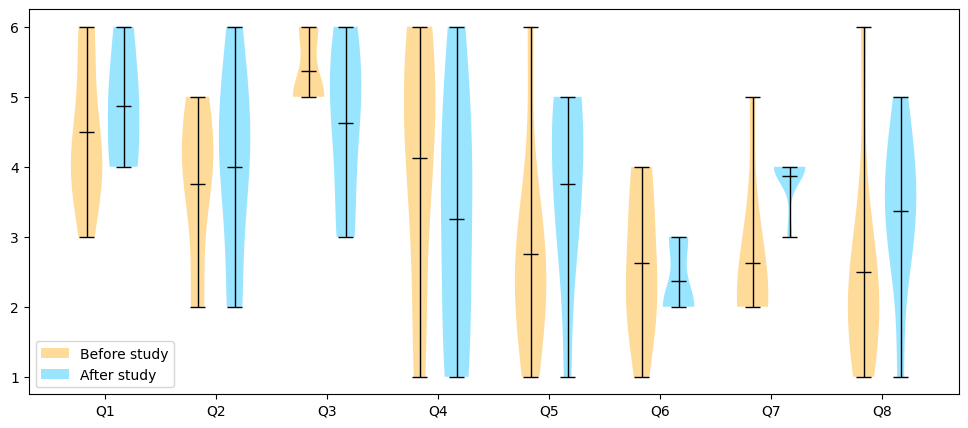

In [61]:
import logging
import matplotlib.pyplot as plt
import pandas as pd

SPACE_BETWEEN_GROUPS = 1
INCLUDE_KARIN = False

# Setup logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Import CSV before data including header
data_before = pd.read_csv('data/general_questions/before.csv', header=None)

# Put data rows into a list including the header
data_list_before_raw = data_before.values.tolist()
data_list_before = []

if INCLUDE_KARIN:
    data_list_before = data_list_before_raw
else:
    for i, item in enumerate(data_list_before_raw):
        # Add item but without index 1
        corrected_item = []
        for j, subitem in enumerate(item):
            if j != 1:
                corrected_item.append(subitem)
        data_list_before.append(corrected_item)


logger.info(f"\n{data_list_before}")

# Import CSV after data including header
data_after = pd.read_csv('data/general_questions/after.csv', header=None)

# Put data rows into a list including the header
data_list_after_raw = data_after.values.tolist()
data_list_after = []

if INCLUDE_KARIN:
    data_list_after = data_list_after_raw
else:
    for i, item in enumerate(data_list_after_raw):
        # Add item but without index 1
        corrected_item = []
        for j, subitem in enumerate(item):
            if j != 1:
                corrected_item.append(subitem)
        data_list_after.append(corrected_item)

logger.info(f"\n{data_list_after}")


data_combined = []
violin_positions = []
label_positions = []

for i in range(len(data_list_before)):
    data_combined.append(data_list_before[i])
    violin_positions.append(i * 2 + 1 + i * SPACE_BETWEEN_GROUPS)
    data_combined.append(data_list_after[i])
    violin_positions.append(i * 2 + 2 + i * SPACE_BETWEEN_GROUPS)
    label_positions.append(i * 2 + 1.5 + i * SPACE_BETWEEN_GROUPS)
    
logger.info(f"Data:\n{data_combined}")

# Customize the x-tick labels
tick_labels = []
for i in range(len(data_before)):
    tick_labels.extend([f'Q{i+1}'])

# Create a violin plot
plt.figure(figsize=(12, 5))
violins = plt.violinplot(data_combined, positions=violin_positions, widths=0.85, showmeans=True)

colors = ['orange', 'deepskyblue']

for i, pc in enumerate(violins['bodies']):
    pc.set_facecolor(colors[i % 2])
    pc.set_alpha(0.4)
    # pc.set_edgecolor('black')
    # pc.set_alpha(1)
    
# Customize the color of the lines
for partname in ('cmedians', 'cmeans', 'cmins', 'cmaxes', 'cbars'):
    vp = violins.get(partname)
    if vp:
        vp.set_edgecolor('black')  # Change this color as needed
        vp.set_linewidth(1)
        

plt.xticks(label_positions, tick_labels)

# Add legend for the colors
plt.legend(['Before study', 'After study'], loc='lower left')

# Save as PDF
plt.savefig(f'output/general_questions_with{'' if INCLUDE_KARIN else 'out'}_karin.pdf', format='pdf')

plt.show()